# Classification: Decision Trees

Weigang Liang <br/>
April 13, 2020

### Contents

1&nbsp; Decision Trees Introductions <br/>
&nbsp;&nbsp; 1.1&nbsp; Split Criterions <br/>
&nbsp;&nbsp; 1.2&nbsp; Preventing Overfitting <br>
2&nbsp; Classification Using Ensemble Learning <br/>
&nbsp;&nbsp; 2.1&nbsp; Bagging and Random Forests <br/>
&nbsp;&nbsp; 2.2&nbsp; Boosting <br/>

## 1. Decision Trees

### What are decision trees?

Training Data -> Decision Tree -> Classify Real Data



Sample decision tree to classify RR Lyraes; ratios are #non-variable stars to #RR Lyrae on training run.

<img src="lecture16_files/example_tree.png" style="width:45%">


### Definition

The decision tree is a fairly intuitive algorithm that categorizes and classifies a dataset by splitting its components through multiple binary criterions until a pre-determined stop. 

The tree starts at one node, which contains the entire dataset. As the dataset is split again and again, the components move along the branches until they reach a pre-determined stop point, often called a "leaf node".



### 1.1 Split Criterion (Entropy)

Starting off, we'll go over one of the criterions used to split the dataset at each junction.

First, some definitions. The book defines the "entropy" as:

$$ E(dataset) = -\sum_i (p_i(dataset) * ln(p_i(dataset)) $$

, where $p_i$ = probability of the $i$th-class given the training data 




When we split the dataset, we want to get the most information/least entropy with a split. Assuming a split criterion $s$, we can define the information gained as

$$IG(d|s) = E(before\_split) - E(after\_split)$$




When we split the dataset, we want to get the most information/least entropy with a split. Assuming a split criterion $s$, we can define the information gained as

$$IG(d|s) = E(before\_split) - E(after\_split)$$
<br>
$$IG(d|s) = E(d) - (\frac{N(d|d < s)}{N} * E(d|d < s) + \frac{N(d|d > s)}{N} * E(d|d > s))$$

, where IG = information gained;  d = dataset; N(d|d<s) = number of points below (d>s for above) the split

Basically we want to maximize IG at every split!

### 1.1 Split Criterion (Gini)

There are other ways to define information gain/loss. The Gini index, defined as

$$ G = 1 - \sum_i p_i^2  $$

is an indicator for how uniform a dataset is. 0 = everything is in one class, etc.

Like the entropy split criterion, we want the lowest possible Gini Index after splitting the data.






In [34]:
#Example code for a simple entropy-based decision tree (part of the code for Fig. 9.13)

for depth in depths:
    classifiers.append([])
    predictions.append([])
    for nc in Ncolors:
        #Main Function
        #############################################################
        clf = DecisionTreeClassifier(random_state=0, max_depth=depth,
                                     criterion='entropy')
        
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])
        #############################################################
        classifiers[-1].append(clf)
        predictions[-1].append(y_pred)

depth=12 is a slight overfit here

<img src="lecture16_files/fig_9_13.png" style="width:70%">



completeness [[0.00729927 0.3649635  0.29927007 0.62773723]
 [0.02189781 0.31386861 0.51824818 0.57664234]]
contamination [[0.66666667 0.375      0.31666667 0.31746032]
 [0.625      0.48809524 0.37719298 0.3875969 ]]


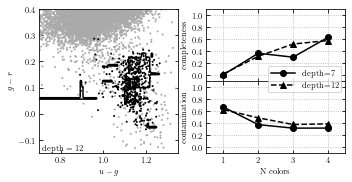

In [21]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)
N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# Fit Decision tree
Ncolors = np.arange(1, X.shape[1] + 1)

classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)
depths = [7, 12]

for depth in depths:
    classifiers.append([])
    predictions.append([])
    for nc in Ncolors:
        clf = DecisionTreeClassifier(random_state=0, max_depth=depth,
                                     criterion='entropy')
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])

        classifiers[-1].append(clf)
        predictions[-1].append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# compute the decision boundary

clf = classifiers[1][1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 101),
                     np.linspace(ylim[0], ylim[1], 101))

Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

ax.text(0.02, 0.02, "depth = %i" % depths[1],
        transform=ax.transAxes)

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness[0], 'o-k', ms=6, label="depth=%i" % depths[0])
ax.plot(Ncolors, completeness[1], '^--k', ms=6, label="depth=%i" % depths[1])

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination[0], 'o-k', ms=6, label="depth=%i" % depths[0])
ax.plot(Ncolors, contamination[1], '^--k', ms=6, label="depth=%i" % depths[1])
ax.legend(loc='lower right',
          bbox_to_anchor=(1.0, 0.79))

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

### 1.2 Preventing Overfitting

- Stopping when one node's components are all of one class.


- Pruning, which goes through the entire tree and sees if making non-tree nodes->tree nodes == +accuracy. 


- Cross correlation to see an upward curve in rms error vs tree depth




- Cross correlation to avoid heading up an upward curve in rms error vs tree depth

<img src="lecture16_files/fig_9_14.png" style="width:70%">




## 2. Classifications using Ensemble Learning

### 2.1 Bagging and Random Forest

Bagging == tree 1 (from data subset) + tree 2 (from subset) + tree 3 (from subset) + ... --> final tree


$$ c(d) = 1/K * \sum_i c_i(d)  $$

, where c=classifications, d = dataset, K=number of subsets

- Trees usually high depths to maximize variance and minimize bias.


### 2.1 Bagging and Random Forest

- Random forest uses the same basic idea as bagging.


- However, the splits of the "sub"-decision trees ("$c_i$") come from optimizing a RANDOM parameter.






- Random forest uses the same basic idea as bagging.


- However, the splits of the "sub"-decision trees ("$c_i$") come from optimizing a RANDOM parameter.


- Compared to bagging this prevents overfitting due to high tree depths, and can discover new correlations within the data. 


- Inputs: number of trees and how many randomized variable at the splits (typically $\sqrt{K}$).





In [14]:
#Example Random Forest Code (from book figure 9.15 code)

def compute_photoz_forest(depth):
    rms_test = np.zeros(len(depth))
    rms_train = np.zeros(len(depth))
    i_best = 0
    z_fit_best = None

    for i, d in enumerate(depth):
        #Main Function
        ########################################################
        clf = RandomForestRegressor(n_estimators=10,
                                    max_depth=d, random_state=0, max_features='auto')
        
        clf.fit(mag_train, z_train)

        z_fit_train = clf.predict(mag_train)
        z_fit = clf.predict(mag_test)
        ########################################################
        rms_train[i] = np.mean(np.sqrt((z_fit_train - z_train) ** 2))
        rms_test[i] = np.mean(np.sqrt((z_fit - z_test) ** 2))

        if rms_test[i] <= rms_test[i_best]:
            i_best = i
            z_fit_best = z_fit

    return rms_test, rms_train, i_best, z_fit_best


depth = np.arange(1, 21)
rms_test, rms_train, i_best, z_fit_best = compute_photoz_forest(depth)
best_depth = depth[i_best]


Signs of overfitting are considerably reduced compared to one tree.

<img src="lecture16_files/fig_9_15.png" style="width:70%">



<img src="lecture16_files/fig_9_14.png" style="width:70%">



@pickle_results: computing results and saving to 'photoz_forest.pkl'


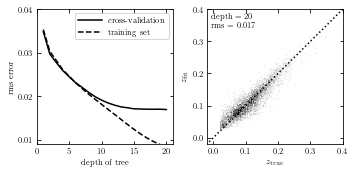

In [17]:
#Random Forest Code

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from astroML.datasets import fetch_sdss_specgals
from astroML.utils.decorators import pickle_results

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch and prepare the data
data = fetch_sdss_specgals()

# put magnitudes in a matrix
mag = np.vstack([data['modelMag_%s' % f] for f in 'ugriz']).T
z = data['z']

# train on ~60,000 points
mag_train = mag[::10]
z_train = z[::10]

# test on ~6,000 distinct points
mag_test = mag[1::100]
z_test = z[1::100]


#------------------------------------------------------------
# Compute the results
#  This is a long computation, so we'll save the results to a pickle.
@pickle_results('photoz_forest.pkl')
def compute_photoz_forest(depth):
    rms_test = np.zeros(len(depth))
    rms_train = np.zeros(len(depth))
    i_best = 0
    z_fit_best = None

    for i, d in enumerate(depth):
        clf = RandomForestRegressor(n_estimators=10,
                                    max_depth=d, random_state=0)
        clf.fit(mag_train, z_train)

        z_fit_train = clf.predict(mag_train)
        z_fit = clf.predict(mag_test)
        rms_train[i] = np.mean(np.sqrt((z_fit_train - z_train) ** 2))
        rms_test[i] = np.mean(np.sqrt((z_fit - z_test) ** 2))

        if rms_test[i] <= rms_test[i_best]:
            i_best = i
            z_fit_best = z_fit

    return rms_test, rms_train, i_best, z_fit_best


depth = np.arange(1, 21)
rms_test, rms_train, i_best, z_fit_best = compute_photoz_forest(depth)
best_depth = depth[i_best]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(wspace=0.25,
                    left=0.1, right=0.95,
                    bottom=0.15, top=0.9)

# left panel: plot cross-validation results
ax = fig.add_subplot(121)
ax.plot(depth, rms_test, '-k', label='cross-validation')
ax.plot(depth, rms_train, '--k', label='training set')
ax.legend(loc=1)

ax.set_xlabel('depth of tree')
ax.set_ylabel('rms error')

ax.set_xlim(0, 21)
ax.set_ylim(0.009,  0.04)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

# right panel: plot best fit
ax = fig.add_subplot(122)

edges = np.linspace(z_test.min(), z_test.max(), 101)
H, zs_bins, zp_bins = np.histogram2d(z_test, z_fit_best, bins=edges)
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto', 
           extent=[zs_bins[0], zs_bins[-1], zs_bins[0], zs_bins[-1]],
           cmap=plt.cm.binary)

ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
ax.text(0.03, 0.97, "depth = %i\nrms = %.3f" % (best_depth, rms_test[i_best]),
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$z_{\rm true}$')
ax.set_ylabel(r'$z_{\rm fit}$')

ax.set_xlim(-0.02, 0.4001)
ax.set_ylim(-0.02, 0.4001)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.show()

### 2.2 Boosting

Bagging == tree1 + tree2 + tree3 + ... --> final tree

Boosting == tree1 -> tree2 -> tree3 -> ... --> final tree

$$ c_{final}(d) = \sum_{i=1}^{K} W_i * c_i(d) $$
 



An example on the commonly used "adaptive boosting" method:

Assumption: 

- We have a set of (training) data "d", and its classifications "y". 

- We also assign a weight "w" to each point in the data, 1/N if a data of size N is uniform.



An example on the commonly used "adaptive boosting" method:

Assumption: 

- We have a set of (training) data "d", and its classifications "y". 

- We also assign a weight "w" to each point in the data, 1/N if a data of size N is uniform.


One. We generate a basic decision tree "c_i" optimized on the tree classification error "e"

$$ e_i = \sum_{j=1}^{N} w_i(d_j)(c_i(d_j) \ \neq \  y_j) $$



An example on the commonly used "adaptive boosting" method:

Assumption: 

- We have a set of (training) data "d", and its classifications "y". 

- We also assign a weight "w" to each point in the data, 1/N if a data of size N is uniform.


One. We generate a basic decision tree "c_i" optimized on the tree classification error "e"

$$ e_i = \sum_{j=1}^{N} w_i(d_j)(c_i(d_j) \ \neq \  y_j) $$

Two. We calculate the main classifier weight "W" as

$$ W_i = \frac{1}{2}log(\frac{1-e_i}{e_i})$$



An example on the commonly used "adaptive boosting" method:

Assumption: 

- We have a set of (training) data "d", and its classifications "y". 

- We also assign a weight "w" to each point in the data, 1/N if a data of size N is uniform.


One. We generate a basic decision tree "c_i" optimized on the tree classification error "e"

$$ e_i = \sum_{j=1}^{N} w_i(d_j)(c_i(d_j) \ \neq \  y_j) $$

Two. We calculate the main classifier weight "W" as

$$ W_i = \frac{1}{2}log(\frac{1-e_i}{e_i})$$

Three. We update the weights "w" of each point by the equations

$$ w_{i+1}(d_j) = w_{i}(d_j) * e^{-W_i} \ ,  \ \ if \ \ c_i(d_j) == y_j $$

$$ w_{i+1}(d_j) = w_{i}(d_j) * e^{W_i} \ ,  \ \ if \ \ c_i(d_j) \neq y_j $$



Three. We update the weights "w" of each point by the equations

$$ w_{i+1}(d_j) = w_{i}(d_j) * e^{-W_i} \ ,  \ \ if \ \ c_i(d_j) == y_j $$

$$ w_{i+1}(d_j) = w_{i}(d_j) * e^{W_i} \ ,  \ \ if \ \ c_i(d_j) \neq y_j $$



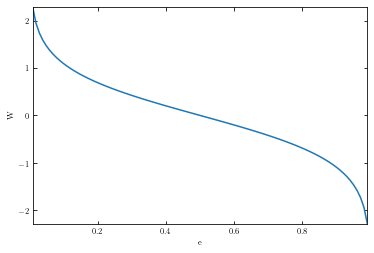

In [41]:
import numpy as np
import matplotlib.pyplot as plt

arr = np.linspace(0.01,0.99,99)
y = 0.5*np.log((1-arr)/arr)
plt.plot(arr,y)
plt.xlabel('e');plt.ylabel('W');

One. We generate a basic decision tree "c_i" optimized on the tree classification error "e"

$$ e_i = \sum_{j=1}^{N} w_i(d_j)(c_i(d_j) \ \neq \  y_j) $$

Two. We calculate the main classifier weight "W" as

$$ W_i = \frac{1}{2}log(\frac{1-e_i}{e_i})$$

Three. We update the weights "w" of each point by the equation

$$ w_{i+1}(d_j) = w_{i}(d_j) * e^{-W_i} \ ,  \ \ if \ \ c_i(d_j) == y_j $$

$$ w_{i+1}(d_j) = w_{i}(d_j) * e^{W_i} \ ,  \ \ if \ \ c_i(d_j) \neq y_j $$

Steps 1-3 are iterated until a desired number i=K, which gives us the final classification.

$$ c_{final}(d) = \sum_{i=1}^{K} W_i * c_i(d) $$



In [ ]:
#Sample Code for Gradient/Adaptive Boosting (from book Figure 9.16 code)

def compute_photoz_forest(N_boosts):
    rms_test = np.zeros(len(N_boosts))
    rms_train = np.zeros(len(N_boosts))
    i_best = 0
    z_fit_best = None

    for i, Nb in enumerate(N_boosts):
        #AdaBoostRegressor/AdaBoostClassifier for adaptive boosting
        
        #Main Function
        ########################################################################
        try:
            # older versions of scikit-learn
            clf = GradientBoostingRegressor(n_estimators=Nb, learn_rate=0.1,
                                            max_depth=3, random_state=0)
        except TypeError:
            clf = GradientBoostingRegressor(n_estimators=Nb, learning_rate=0.1,
                                            max_depth=3, random_state=0)
        ########################################################################
        clf.fit(mag_train, z_train)

        z_fit_train = clf.predict(mag_train)
        z_fit = clf.predict(mag_test)
        rms_train[i] = np.mean(np.sqrt((z_fit_train - z_train) ** 2))
        rms_test[i] = np.mean(np.sqrt((z_fit - z_test) ** 2))

        if rms_test[i] <= rms_test[i_best]:
            i_best = i
            z_fit_best = z_fit

    return rms_test, rms_train, i_best, z_fit_best

High boosting numbers but still not overfitting

<img src="lecture16_files/fig_9_16.png" style="width:70%">



### Bagging vs. Boosting

|Feature| Bagging |  Boosting   |
|-----|------|------|
|good for parallelization|   yes  | no|
|aims to| -variance | -bias|
|suited for| high variance, low bias (results unclear apple/pear, i.e. 3a2p)| low variance, high bias (always barely apples, but should be pear)



@pickle_results: computing results and saving to 'photoz_boosting.pkl'


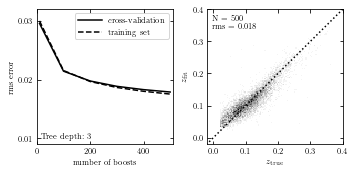

In [16]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from astroML.datasets import fetch_sdss_specgals
from astroML.utils.decorators import pickle_results


#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch and prepare the data
data = fetch_sdss_specgals()

# put magnitudes in a matrix
mag = np.vstack([data['modelMag_%s' % f] for f in 'ugriz']).T
z = data['z']

# train on ~60,000 points
mag_train = mag[::10]
z_train = z[::10]

# test on ~6,000 distinct points
mag_test = mag[1::100]
z_test = z[1::100]


#------------------------------------------------------------
# Compute the results
#  This is a long computation, so we'll save the results to a pickle.
@pickle_results('photoz_boosting.pkl')
def compute_photoz_forest(N_boosts):
    rms_test = np.zeros(len(N_boosts))
    rms_train = np.zeros(len(N_boosts))
    i_best = 0
    z_fit_best = None

    for i, Nb in enumerate(N_boosts):
        try:
            # older versions of scikit-learn
            clf = GradientBoostingRegressor(n_estimators=Nb, learn_rate=0.1,
                                            max_depth=3, random_state=0)
        except TypeError:
            clf = GradientBoostingRegressor(n_estimators=Nb, learning_rate=0.1,
                                            max_depth=3, random_state=0)
        clf.fit(mag_train, z_train)

        z_fit_train = clf.predict(mag_train)
        z_fit = clf.predict(mag_test)
        rms_train[i] = np.mean(np.sqrt((z_fit_train - z_train) ** 2))
        rms_test[i] = np.mean(np.sqrt((z_fit - z_test) ** 2))

        if rms_test[i] <= rms_test[i_best]:
            i_best = i
            z_fit_best = z_fit

    return rms_test, rms_train, i_best, z_fit_best

N_boosts = (10, 100, 200, 300, 400, 500)
rms_test, rms_train, i_best, z_fit_best = compute_photoz_forest(N_boosts)
best_N = N_boosts[i_best]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(wspace=0.25,
                    left=0.1, right=0.95,
                    bottom=0.15, top=0.9)

# left panel: plot cross-validation results
ax = fig.add_subplot(121)
ax.plot(N_boosts, rms_test, '-k', label='cross-validation')
ax.plot(N_boosts, rms_train, '--k', label='training set')
ax.legend(loc=1)

ax.set_xlabel('number of boosts')
ax.set_ylabel('rms error')
ax.set_xlim(0, 510)
ax.set_ylim(0.009,  0.032)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

ax.text(0.03, 0.03, "Tree depth: 3",
        ha='left', va='bottom', transform=ax.transAxes)

# right panel: plot best fit
ax = fig.add_subplot(122)
edges = np.linspace(z_test.min(), z_test.max(), 101)
H, zs_bins, zp_bins = np.histogram2d(z_test, z_fit_best, bins=edges)
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto', 
           extent=[zs_bins[0], zs_bins[-1], zs_bins[0], zs_bins[-1]],
           cmap=plt.cm.binary)

ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
ax.text(0.04, 0.96, "N = %i\nrms = %.3f" % (best_N, rms_test[i_best]),
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$z_{\rm true}$')
ax.set_ylabel(r'$z_{\rm fit}$')

ax.set_xlim(-0.02, 0.4001)
ax.set_ylim(-0.02, 0.4001)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.show()